# MTA Turnstyle Data Cleaning and Exploration

## Importing and Cleaning the Data

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
df = pd.read_csv('may_and_june_2018.txt')
df.describe()

,ENTRIES,EXITS
count,7.887640e+05,7.887640e+05
mean,3.934975e+07,3.231041e+07
std,2.050682e+08,1.898601e+08
min,0.000000e+00,0.000000e+00
25%,5.114850e+05,2.476590e+05
50%,2.567316e+06,1.450646e+06
75%,6.890814e+06,4.822835e+06
max,2.129960e+09,2.062638e+09


In [5]:
df.columns = df.columns.str.strip()

In [6]:
del df['LINENAME']
del df['DIVISION']
df = df[df.DESC == 'REGULAR']

In [7]:
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,04/28/2018,00:00:00,REGULAR,6598847,2235829
1,A002,R051,02-00-00,59 ST,04/28/2018,04:00:00,REGULAR,6598864,2235830
2,A002,R051,02-00-00,59 ST,04/28/2018,08:00:00,REGULAR,6598880,2235863
3,A002,R051,02-00-00,59 ST,04/28/2018,12:00:00,REGULAR,6598961,2235955
4,A002,R051,02-00-00,59 ST,04/28/2018,16:00:00,REGULAR,6599175,2236015


In [8]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'], format='%m/%d/%Y %H:%M:%S')

In [9]:
df.sort_values(by=['STATION','SCP','UNIT','DATETIME'],axis=0,inplace=True)
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
30193,H007,R248,00-00-00,1 AV,04/28/2018,00:00:00,REGULAR,13470157,15068968,2018-04-28 00:00:00
30194,H007,R248,00-00-00,1 AV,04/28/2018,04:00:00,REGULAR,13470247,15069262,2018-04-28 04:00:00
30195,H007,R248,00-00-00,1 AV,04/28/2018,08:00:00,REGULAR,13470336,15069583,2018-04-28 08:00:00
30196,H007,R248,00-00-00,1 AV,04/28/2018,12:00:00,REGULAR,13470882,15070622,2018-04-28 12:00:00
30197,H007,R248,00-00-00,1 AV,04/28/2018,16:00:00,REGULAR,13471623,15071910,2018-04-28 16:00:00


In [10]:
df.shape

(786524, 10)

In [12]:
df['TIMEDIFF'] = (df['DATETIME'] - df['DATETIME'].shift()).fillna(0)
df['DELTA_ENTRIES'] = (df['ENTRIES'] - df['ENTRIES'].shift()).fillna(0)
df['DELTA_EXITS'] = (df['EXITS'] - df['EXITS'].shift()).fillna(0)
df['key_d'] = df['STATION'] + "|" +  df['SCP'] +  "|" + df['UNIT']

In [13]:
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TIMEDIFF,DELTA_ENTRIES,DELTA_EXITS,key_d
30193,H007,R248,00-00-00,1 AV,04/28/2018,00:00:00,REGULAR,13470157,15068968,2018-04-28 00:00:00,00:00:00,0.0,0.0,1 AV|00-00-00|R248
30194,H007,R248,00-00-00,1 AV,04/28/2018,04:00:00,REGULAR,13470247,15069262,2018-04-28 04:00:00,04:00:00,90.0,294.0,1 AV|00-00-00|R248
30195,H007,R248,00-00-00,1 AV,04/28/2018,08:00:00,REGULAR,13470336,15069583,2018-04-28 08:00:00,04:00:00,89.0,321.0,1 AV|00-00-00|R248
30196,H007,R248,00-00-00,1 AV,04/28/2018,12:00:00,REGULAR,13470882,15070622,2018-04-28 12:00:00,04:00:00,546.0,1039.0,1 AV|00-00-00|R248
30197,H007,R248,00-00-00,1 AV,04/28/2018,16:00:00,REGULAR,13471623,15071910,2018-04-28 16:00:00,04:00:00,741.0,1288.0,1 AV|00-00-00|R248


In [14]:
df.describe()

,ENTRIES,EXITS,TIMEDIFF,DELTA_ENTRIES,DELTA_EXITS
count,7.865240e+05,7.865240e+05,786524,7.865240e+05,7.865240e+05
mean,3.938685e+07,3.234447e+07,0 days 00:00:03.062080,-1.712614e+01,-1.915881e+01
std,2.052009e+08,1.899560e+08,2 days 03:45:03.731845,2.216922e+07,1.987369e+07
min,0.000000e+00,0.000000e+00,-28 days +00:00:13,-2.123203e+09,-2.062469e+09
25%,5.120528e+05,2.480968e+05,0 days 04:00:00,9.000000e+00,8.000000e+00
50%,2.567648e+06,1.451771e+06,0 days 04:00:00,7.700000e+01,5.300000e+01
75%,6.891282e+06,4.824246e+06,0 days 04:00:00,2.550000e+02,1.730000e+02
max,2.129960e+09,2.062638e+09,9 days 19:44:57,2.128752e+09,2.045861e+09


In [15]:
df = df[df['key_d'] == df['key_d'].shift()]
df = df[df['DELTA_ENTRIES'] >= 0]
df = df[df['DELTA_ENTRIES'] < 100000]
df = df[df['DELTA_EXITS'] >= 0]
df = df[df['DELTA_EXITS'] < 100000]
df = df[df['TIMEDIFF'] > pd.Timedelta(0)]

In [16]:
df.describe()

,ENTRIES,EXITS,TIMEDIFF,DELTA_ENTRIES,DELTA_EXITS
count,7.729470e+05,7.729470e+05,772947,772947.000000,772947.000000
mean,2.654549e+07,1.921083e+07,0 days 04:00:50.669401,184.601466,141.090534
std,1.530916e+08,1.309728e+08,0 days 00:41:04.638931,264.701761,238.920951
min,0.000000e+00,0.000000e+00,0 days 00:00:11,0.000000,0.000000
25%,4.989200e+05,2.407595e+05,0 days 04:00:00,10.000000,8.000000
50%,2.482382e+06,1.408533e+06,0 days 04:00:00,79.000000,54.000000
75%,6.698680e+06,4.656029e+06,0 days 04:00:00,255.000000,173.000000
max,2.115487e+09,2.037086e+09,9 days 19:44:57,10219.000000,37996.000000


In [17]:
df['footfalls'] = df['DELTA_ENTRIES'] + df['DELTA_EXITS']
by_station_date_time = df.groupby(['STATION', 'DATETIME']).sum()
by_station_date_time.sort_values(by=['footfalls'],inplace=True,ascending=False)
by_station_date_time.head(20)

ENTRIES       EXITS  DELTA_ENTRIES  \
STATION         DATETIME                                                     
34 ST-PENN STA  2018-05-15 20:00:00  1905924834  1706587230        36581.0   
                2018-05-16 20:00:00  1906046390  1706697551        35919.0   
34 ST-HERALD SQ 2018-05-09 20:00:00  1548174485  1350215411        51122.0   
                2018-05-16 20:00:00  1548881289  1350862690        50501.0   
                2018-05-15 20:00:00  1548763344  1350752585        48915.0   
                2018-05-03 20:00:00  1547580480  1349671058        50422.0   
                2018-05-08 20:00:00  1548054721  1350105578        51090.0   
                2018-05-10 20:00:00  1548295595  1350325565        50414.0   
                2018-05-11 20:00:00  1548415026  1350437731        48873.0   
                2018-04-30 20:00:00  1547226397  1349347260        49455.0   
                2018-05-23 20:00:00  1549315693  1351115944        50151.0   
                2018-05-17 20:00:00  1548998058  1350969749        49259.0   
                2018-05-04 20:00:00  1547699188  1349779709        48974.0   
                2018-05-02 20:00:00  1547460138  1349561687        49893.0   
34 ST-PENN STA  2018-05-22 20:00:00  1906628717  1707236482        34921.0   
                2018-05-23 20:00:00  1906747200  1707346844        34256.0   
34 ST-HERALD SQ 2018-05-22 20:00:00  1549199491  1351009096        48935.0   
                2018-05-24 20:00:00  1549433800  1351224239        48532.0   
34 ST-PENN STA  2018-05-09 20:00:00  1905335953  1706045036        34542.0   
34 ST-HERALD SQ 2018-05-01 20:00:00  1547340939  1349453564        49117.0   

                                     DELTA_EXITS  footfalls  
STATION         DATETIME                                     
34 ST-PENN STA  2018-05-15 20:00:00      48847.0    85428.0  
                2018-05-16 20:00:00      47395.0    83314.0  
34 ST-HERALD SQ 2018-05-09 20:00:00      31868.0    82990.0  
                2018-05-16 20:00:00      32452.0    82953.0  
                2018-05-15 20:00:00      33666.0    82581.0  
                2018-05-03 20:00:00      31830.0    82252.0  
                2018-05-08 20:00:00      31056.0    82146.0  
                2018-05-10 20:00:00      31724.0    82138.0  
                2018-05-11 20:00:00      33236.0    82109.0  
                2018-04-30 20:00:00      32224.0    81679.0  
                2018-05-23 20:00:00      31411.0    81562.0  
                2018-05-17 20:00:00      32291.0    81550.0  
                2018-05-04 20:00:00      32085.0    81059.0  
                2018-05-02 20:00:00      31124.0    81017.0  
34 ST-PENN STA  2018-05-22 20:00:00      45989.0    80910.0  
                2018-05-23 20:00:00      46583.0    80839.0  
34 ST-HERALD SQ 2018-05-22 20:00:00      31593.0    80528.0  
                2018-05-24 20:00:00      31874.0    80406.0  
34 ST-PENN STA  2018-05-09 20:00:00      45528.0    80070.0  
34 ST-HERALD SQ 2018-05-01 20:00:00      30783.0    79900.0

In [18]:
df['hourbin'] =  4 * (df['DATETIME'].dt.hour // 4)
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TIMEDIFF,DELTA_ENTRIES,DELTA_EXITS,key_d,footfalls,hourbin
30194,H007,R248,00-00-00,1 AV,04/28/2018,04:00:00,REGULAR,13470247,15069262,2018-04-28 04:00:00,04:00:00,90.0,294.0,1 AV|00-00-00|R248,384.0,4
30195,H007,R248,00-00-00,1 AV,04/28/2018,08:00:00,REGULAR,13470336,15069583,2018-04-28 08:00:00,04:00:00,89.0,321.0,1 AV|00-00-00|R248,410.0,8
30196,H007,R248,00-00-00,1 AV,04/28/2018,12:00:00,REGULAR,13470882,15070622,2018-04-28 12:00:00,04:00:00,546.0,1039.0,1 AV|00-00-00|R248,1585.0,12
30197,H007,R248,00-00-00,1 AV,04/28/2018,16:00:00,REGULAR,13471623,15071910,2018-04-28 16:00:00,04:00:00,741.0,1288.0,1 AV|00-00-00|R248,2029.0,16
30198,H007,R248,00-00-00,1 AV,04/28/2018,20:00:00,REGULAR,13472316,15073470,2018-04-28 20:00:00,04:00:00,693.0,1560.0,1 AV|00-00-00|R248,2253.0,20


## Seperating Weekday and Weekend Data

In [19]:
weekdays_data = df[df['DATETIME'].dt.dayofweek < 5]
weekdays_data.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TIMEDIFF,DELTA_ENTRIES,DELTA_EXITS,key_d,footfalls,hourbin
30205,H007,R248,00-00-00,1 AV,04/30/2018,00:00:00,REGULAR,13474940,15078584,2018-04-30 00:00:00,04:00:00,322.0,540.0,1 AV|00-00-00|R248,862.0,0
30206,H007,R248,00-00-00,1 AV,04/30/2018,04:00:00,REGULAR,13474962,15078681,2018-04-30 04:00:00,04:00:00,22.0,97.0,1 AV|00-00-00|R248,119.0,4
30207,H007,R248,00-00-00,1 AV,04/30/2018,08:00:00,REGULAR,13475296,15079536,2018-04-30 08:00:00,04:00:00,334.0,855.0,1 AV|00-00-00|R248,1189.0,8
30208,H007,R248,00-00-00,1 AV,04/30/2018,12:00:00,REGULAR,13476413,15080969,2018-04-30 12:00:00,04:00:00,1117.0,1433.0,1 AV|00-00-00|R248,2550.0,12
30209,H007,R248,00-00-00,1 AV,04/30/2018,16:00:00,REGULAR,13477408,15081781,2018-04-30 16:00:00,04:00:00,995.0,812.0,1 AV|00-00-00|R248,1807.0,16


In [20]:
by_station_hourbin_all_weekdays = weekdays_data.groupby(['STATION', 'hourbin']).sum()
by_station_hourbin_all_weekdays.head()

ENTRIES        EXITS  DELTA_ENTRIES  DELTA_EXITS  \
STATION hourbin                                                         
1 AV    0        60739144435  32496804559        72061.0      67728.0   
        4        60739156094  32496813001        11659.0       8442.0   
        8        60739186915  32496881541        30821.0      68540.0   
        12       60739282975  32497002298        96060.0     120757.0   
        16       60739383081  32497091375       100106.0      89077.0   

                 footfalls  
STATION hourbin             
1 AV    0         139789.0  
        4          20101.0  
        8          99361.0  
        12        216817.0  
        16        189183.0

In [22]:
by_station_hourbin_all_weekdays.sort_values(by=['hourbin','footfalls'],inplace=True,ascending=False)
pd.set_option('display.max_rows', 2500)
by_station_hourbin_all_weekdays

,,ENTRIES,EXITS,DELTA_ENTRIES,DELTA_EXITS,footfalls
STATION,hourbin,,,,,
GRD CNTRL-42 ST,20,20432068670,19115592487,1252317.0,682319.0,1934636.0
34 ST-PENN STA,20,79509157339,58824602537,840587.0,1042206.0,1882793.0
34 ST-HERALD SQ,20,30969167387,27008785674,974796.0,627840.0,1602636.0
23 ST,20,79004499598,92310853908,973912.0,407209.0,1381121.0
TIMES SQ-42 ST,20,78852697600,62465432128,847450.0,472071.0,1319521.0
14 ST-UNION SQ,20,16755517672,5961401018,800310.0,422352.0,1222662.0
86 ST,20,30453260229,13714387290,521423.0,450643.0,972066.0
FULTON ST,20,85121464026,81984000524,674958.0,267950.0,942908.0
42 ST-PORT AUTH,20,70679943943,49382421070,393797.0,535428.0,929225.0


In [23]:
weekend_data = df[df['DATETIME'].dt.dayofweek >= 5]
weekend_data.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TIMEDIFF,DELTA_ENTRIES,DELTA_EXITS,key_d,footfalls,hourbin
30194,H007,R248,00-00-00,1 AV,04/28/2018,04:00:00,REGULAR,13470247,15069262,2018-04-28 04:00:00,04:00:00,90.0,294.0,1 AV|00-00-00|R248,384.0,4
30195,H007,R248,00-00-00,1 AV,04/28/2018,08:00:00,REGULAR,13470336,15069583,2018-04-28 08:00:00,04:00:00,89.0,321.0,1 AV|00-00-00|R248,410.0,8
30196,H007,R248,00-00-00,1 AV,04/28/2018,12:00:00,REGULAR,13470882,15070622,2018-04-28 12:00:00,04:00:00,546.0,1039.0,1 AV|00-00-00|R248,1585.0,12
30197,H007,R248,00-00-00,1 AV,04/28/2018,16:00:00,REGULAR,13471623,15071910,2018-04-28 16:00:00,04:00:00,741.0,1288.0,1 AV|00-00-00|R248,2029.0,16
30198,H007,R248,00-00-00,1 AV,04/28/2018,20:00:00,REGULAR,13472316,15073470,2018-04-28 20:00:00,04:00:00,693.0,1560.0,1 AV|00-00-00|R248,2253.0,20


In [24]:
by_station_hourbin_weekends = weekend_data.groupby(['STATION', 'hourbin']).sum()
by_station_hourbin_weekends.head()

ENTRIES        EXITS  DELTA_ENTRIES  DELTA_EXITS  \
STATION hourbin                                                         
1 AV    0        21258451275  11373604418        31818.0      32292.0   
        4        24295118167  12998120476        12478.0       9410.0   
        8        24295122464  12998127526         4297.0       7050.0   
        12       24295142627  12998151803        20163.0      24277.0   
        16       24295177444  12998190188        34817.0      38385.0   

                 footfalls  
STATION hourbin             
1 AV    0          64110.0  
        4          21888.0  
        8          11347.0  
        12         44440.0  
        16         73202.0

## Plotting Top Stations

In [26]:
df_agg = df.groupby(['STATION']).agg({'footfalls':sum})
top_stations = df_agg.sort_values(['footfalls'],ascending=False).head(20)

top_stations

,footfalls
STATION,
34 ST-PENN STA,7506870.0
GRD CNTRL-42 ST,6647116.0
34 ST-HERALD SQ,5352967.0
14 ST-UNION SQ,5041639.0
TIMES SQ-42 ST,4855180.0
23 ST,4838978.0
FULTON ST,4308238.0
42 ST-PORT AUTH,4113203.0
86 ST,3902224.0


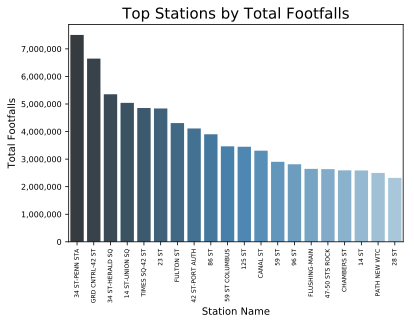

In [27]:
top_stations['STATION'] = top_stations.index
g = sns.barplot(x = 'STATION', y = 'footfalls', data = top_stations, palette = "Blues_d")
plt.title('Top Stations by Total Footfalls', fontsize = 15)
plt.xlabel('Station Name')
plt.ylabel('Total Footfalls')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 6)
g.set_yticklabels(g.get_yticklabels(), fontsize = 8)
g.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));

In [28]:
# check top stations for weekdays
df_agg = weekdays_data.groupby(['STATION']).agg({'footfalls':sum})
top_wd_stations = df_agg.sort_values(['footfalls'],ascending=False).head(20)

top_wd_stations

,footfalls
STATION,
34 ST-PENN STA,6309881.0
GRD CNTRL-42 ST,5847749.0
34 ST-HERALD SQ,4440386.0
23 ST,4139451.0
14 ST-UNION SQ,4007475.0
TIMES SQ-42 ST,3906285.0
FULTON ST,3764764.0
42 ST-PORT AUTH,3241789.0
86 ST,3226414.0


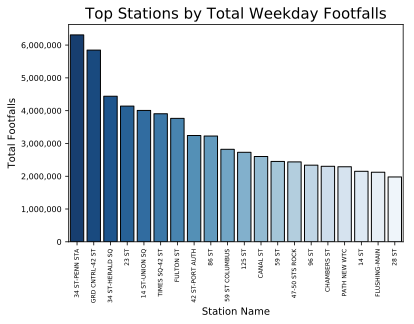

In [29]:
top_wd_stations['STATION'] = top_wd_stations.index
g = sns.barplot(x = 'STATION', y = 'footfalls', data = top_wd_stations, palette = "Blues_r", edgecolor="k", linewidth = 1)
plt.title('Top Stations by Total Weekday Footfalls', fontsize = 15)
plt.xlabel('Station Name')
plt.ylabel('Total Footfalls')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 6)
g.set_yticklabels(g.get_yticklabels(), fontsize = 8)
g.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));

In [30]:
# check top stations for weekends

df_agg = weekend_data.groupby(['STATION']).agg({'footfalls':sum})
top_we_stations = df_agg.sort_values(['footfalls'],ascending=False).head(20)

top_we_stations

,footfalls
STATION,
34 ST-PENN STA,1196989.0
14 ST-UNION SQ,1034164.0
TIMES SQ-42 ST,948895.0
34 ST-HERALD SQ,912581.0
42 ST-PORT AUTH,871414.0
GRD CNTRL-42 ST,799367.0
125 ST,719892.0
CANAL ST,705610.0
23 ST,699527.0
